In [50]:
import cv2
from forwardF import wm_au_emb
import numpy as np
from matplotlib import pyplot as plt
from detectF import *
from recoveryF import stage1_recovery,stage2_recovery

In [51]:
list_image = []
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\png\\airplane.png")
list_image.append(image)
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\png\\baboon.png")
list_image.append(image)
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\tiff\\sailboat.tiff")
list_image.append(image)
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\png\\Lena.png")
list_image.append(image)
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\png\\peppers.png")
list_image.append(image)
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\tiff\\splash.tiff")
list_image.append(image)
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\tiff\\house.tiff")
list_image.append(image)
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\bmp\\tiffany.bmp")
list_image.append(image)
list_w_image = []
for i in range(len(list_image)):
    w_image = wm_au_emb(list_image[i],(13,137,811))
    list_w_image.append(w_image)
w_psnr_list = []
for i in range(len(list_w_image)):
    w_psnr_list.append(cv2.PSNR(list_w_image[i],list_image[i]))

In [52]:
print(w_psnr_list)
print(np.mean(w_psnr_list))

[46.36129572380262, 46.3605792981372, 46.33925462461959, 46.36208944098598, 46.21921669648464, 46.25222793213186, 46.34764886292099, 46.30962791447391]
46.3189925616946


In [53]:
print(np.sqrt(512*512*80/100))
print(458/2)

457.9467217919569
229.0


In [54]:
list_tp_rate_10_80 = [82,229]

In [55]:
N = 512
np.random.seed(1)
t_all_image = np.random.randint(
    low=0, 
    high=256,
    size=(N, N, 3),
    dtype=np.uint8
)

In [56]:
list_recovery_10_PSNR_stage2 = []
list_recovery_10_PSNR_stage3 = []
list_t_image_10 = []
list_detect_matrix_10 = []
list_recovered_image_10 = []
for index in range(len(list_w_image)):
    t_img = list_w_image[index].copy()
    t_img[256-81:256+81,256-81:256+81,:] =  t_all_image[256-81:256+81,256-81:256+81,:]
    list_t_image_10.append(t_img)
    lv1_matrix = level_one_detection(t_img)
    lv2_matrix = lv1_matrix.copy()
    lv3_matrix = lv1_matrix.copy()
    for channel in range(3):
        lv2_matrix[:,:,channel] = level_two_detection(lv1_matrix[:,:,channel])
        lv3_matrix[:,:,channel] = level_three_detection(lv2_matrix[:,:,channel])
    list_detect_matrix_10.append(lv3_matrix)
    r1_img,lv4_BGR= stage1_recovery(t_img=t_img,key=(13,137,811))
    r2_img,lv5_BGR = stage2_recovery(r1_img=r1_img,lv4_matrix=lv4_BGR)
    mask1 = np.zeros((512,512),dtype = np.uint8)
    for i in range(512):
        for j in range(512):
            if not lv5_BGR[int(i/1),int(j/1),0]:
                mask1[i,j] = 255
    mask2 = np.zeros((512,512),dtype = np.uint8)
    for i in range(512):
        for j in range(512):
            if not lv5_BGR[int(i/1),int(j/1),1]:
                mask2[i,j] = 255
    mask3 = np.zeros((512,512),dtype = np.uint8)
    for i in range(512):
        for j in range(512):
            if not lv5_BGR[int(i/1),int(j/1),2]:
                mask3[i,j] = 255
    r3_img = t_img.copy()
    r3_img[:,:,0] = cv2.inpaint(r2_img[:,:,0],mask1,0.5,cv2.INPAINT_TELEA)
    r3_img[:,:,1] = cv2.inpaint(r2_img[:,:,1],mask2,0.5,cv2.INPAINT_TELEA)
    r3_img[:,:,2] = cv2.inpaint(r2_img[:,:,2],mask3,0.5,cv2.INPAINT_TELEA)
    list_recovery_10_PSNR_stage2.append(cv2.PSNR(r2_img,list_w_image[index]))
    list_recovery_10_PSNR_stage3.append(cv2.PSNR(r3_img,list_w_image[index]))
    list_recovered_image_10.append(r3_img)
print(list_recovery_10_PSNR_stage2)
print(list_recovery_10_PSNR_stage3)
print(np.mean(list_recovery_10_PSNR_stage3))

[34.01046240546436, 35.04788817607616, 34.95634681977737, 34.96393859845025, 35.74680927064807, 38.655412860135485, 33.229430909442634, 38.62798190972307]
[38.78973157369395, 38.648776531002945, 37.881359007415945, 39.631948243711264, 39.01303052634209, 43.66653194722163, 37.78694769485477, 41.5999316092681]
39.62728214168884


In [57]:
list_recovery_80_PSNR_stage2 = []
list_recovery_80_PSNR_stage3 = []
list_t_image_80 = []
list_detect_matrix_80 = []
list_recovered_image_80 = []
for index in range(len(list_w_image)):
    t_img = list_w_image[index].copy()
    t_img[256-229:256+229,256-229:256+229,:] =  t_all_image[256-229:256+229,256-229:256+229,:]
    list_t_image_80.append(t_img)
    lv1_matrix = level_one_detection(t_img)
    lv2_matrix = lv1_matrix.copy()
    lv3_matrix = lv1_matrix.copy()
    for channel in range(3):
        lv2_matrix[:,:,channel] = level_two_detection(lv1_matrix[:,:,channel])
        lv3_matrix[:,:,channel] = level_three_detection(lv2_matrix[:,:,channel])
    list_detect_matrix_80.append(lv3_matrix)
    r1_img,lv4_BGR = stage1_recovery(t_img=t_img,key=(13,137,811))
    r2_img,lv5_BGR = stage2_recovery(r1_img=r1_img,lv4_matrix=lv4_BGR)
    mask1 = np.zeros((512,512),dtype = np.uint8)
    for i in range(512):
        for j in range(512):
            if not lv5_BGR[int(i/1),int(j/1),0]:
                mask1[i,j] = 255
    mask2 = np.zeros((512,512),dtype = np.uint8)
    for i in range(512):
        for j in range(512):
            if not lv5_BGR[int(i/1),int(j/1),1]:
                mask2[i,j] = 255
    mask3 = np.zeros((512,512),dtype = np.uint8)
    for i in range(512):
        for j in range(512):
            if not lv5_BGR[int(i/1),int(j/1),2]:
                mask3[i,j] = 255
    r3_img = r2_img.copy()
    r3_img[:,:,0] = cv2.inpaint(r2_img[:,:,0],mask1,0.5,cv2.INPAINT_TELEA)
    r3_img[:,:,1] = cv2.inpaint(r2_img[:,:,1],mask2,0.5,cv2.INPAINT_TELEA)
    r3_img[:,:,2] = cv2.inpaint(r2_img[:,:,2],mask3,0.5,cv2.INPAINT_TELEA)
    list_recovery_80_PSNR_stage2.append(cv2.PSNR(r2_img,list_w_image[index]))
    list_recovery_80_PSNR_stage3.append(cv2.PSNR(r3_img,list_w_image[index]))
    list_recovered_image_80.append(r3_img)
print(list_recovery_80_PSNR_stage2)
print(list_recovery_80_PSNR_stage3)
print(np.mean(list_recovery_80_PSNR_stage3))

[9.95104430426881, 10.550971707418809, 9.966747558088233, 10.52855969735264, 10.022776988736066, 9.618810109244835, 10.502990153814322, 8.920535341789654]
[22.16315454882745, 18.50721221472106, 19.97092773935004, 23.198110127861092, 22.25493656283231, 25.039884135469414, 20.807609176451777, 25.887855862349557]
22.228711295982837


In [58]:
print("Overall results:")
print("PSNR of Watermarked Images:")
print(w_psnr_list)
print("Average PSNR of Watermarked Images:")
print(np.mean(w_psnr_list))
print("PSNR of Recovered Images with tampering rate = 10%:")
print(list_recovery_10_PSNR_stage3)
print("Average PSNR of Recovered Images with tampering rate = 10%:")
print(np.mean(list_recovery_10_PSNR_stage3))
print("PSNR of Recovered Images with tampering rate = 80%:")
print(list_recovery_80_PSNR_stage3)
print("Average PSNR of Recovered Images with tampering rate = 80%:")
print(np.mean(list_recovery_80_PSNR_stage3))

Overall results:
PSNR of Watermarked Images:
[46.36129572380262, 46.3605792981372, 46.33925462461959, 46.36208944098598, 46.21921669648464, 46.25222793213186, 46.34764886292099, 46.30962791447391]
Average PSNR of Watermarked Images:
46.3189925616946
PSNR of Recovered Images with tampering rate = 10%:
[38.78973157369395, 38.648776531002945, 37.881359007415945, 39.631948243711264, 39.01303052634209, 43.66653194722163, 37.78694769485477, 41.5999316092681]
Average PSNR of Recovered Images with tampering rate = 10%:
39.62728214168884
PSNR of Recovered Images with tampering rate = 80%:
[22.16315454882745, 18.50721221472106, 19.97092773935004, 23.198110127861092, 22.25493656283231, 25.039884135469414, 20.807609176451777, 25.887855862349557]
Average PSNR of Recovered Images with tampering rate = 80%:
22.228711295982837


In [59]:
list_title = ["Host Image","Watermarked Image","Tampered Image 10%","Detection Matrix","Recovered Image"]

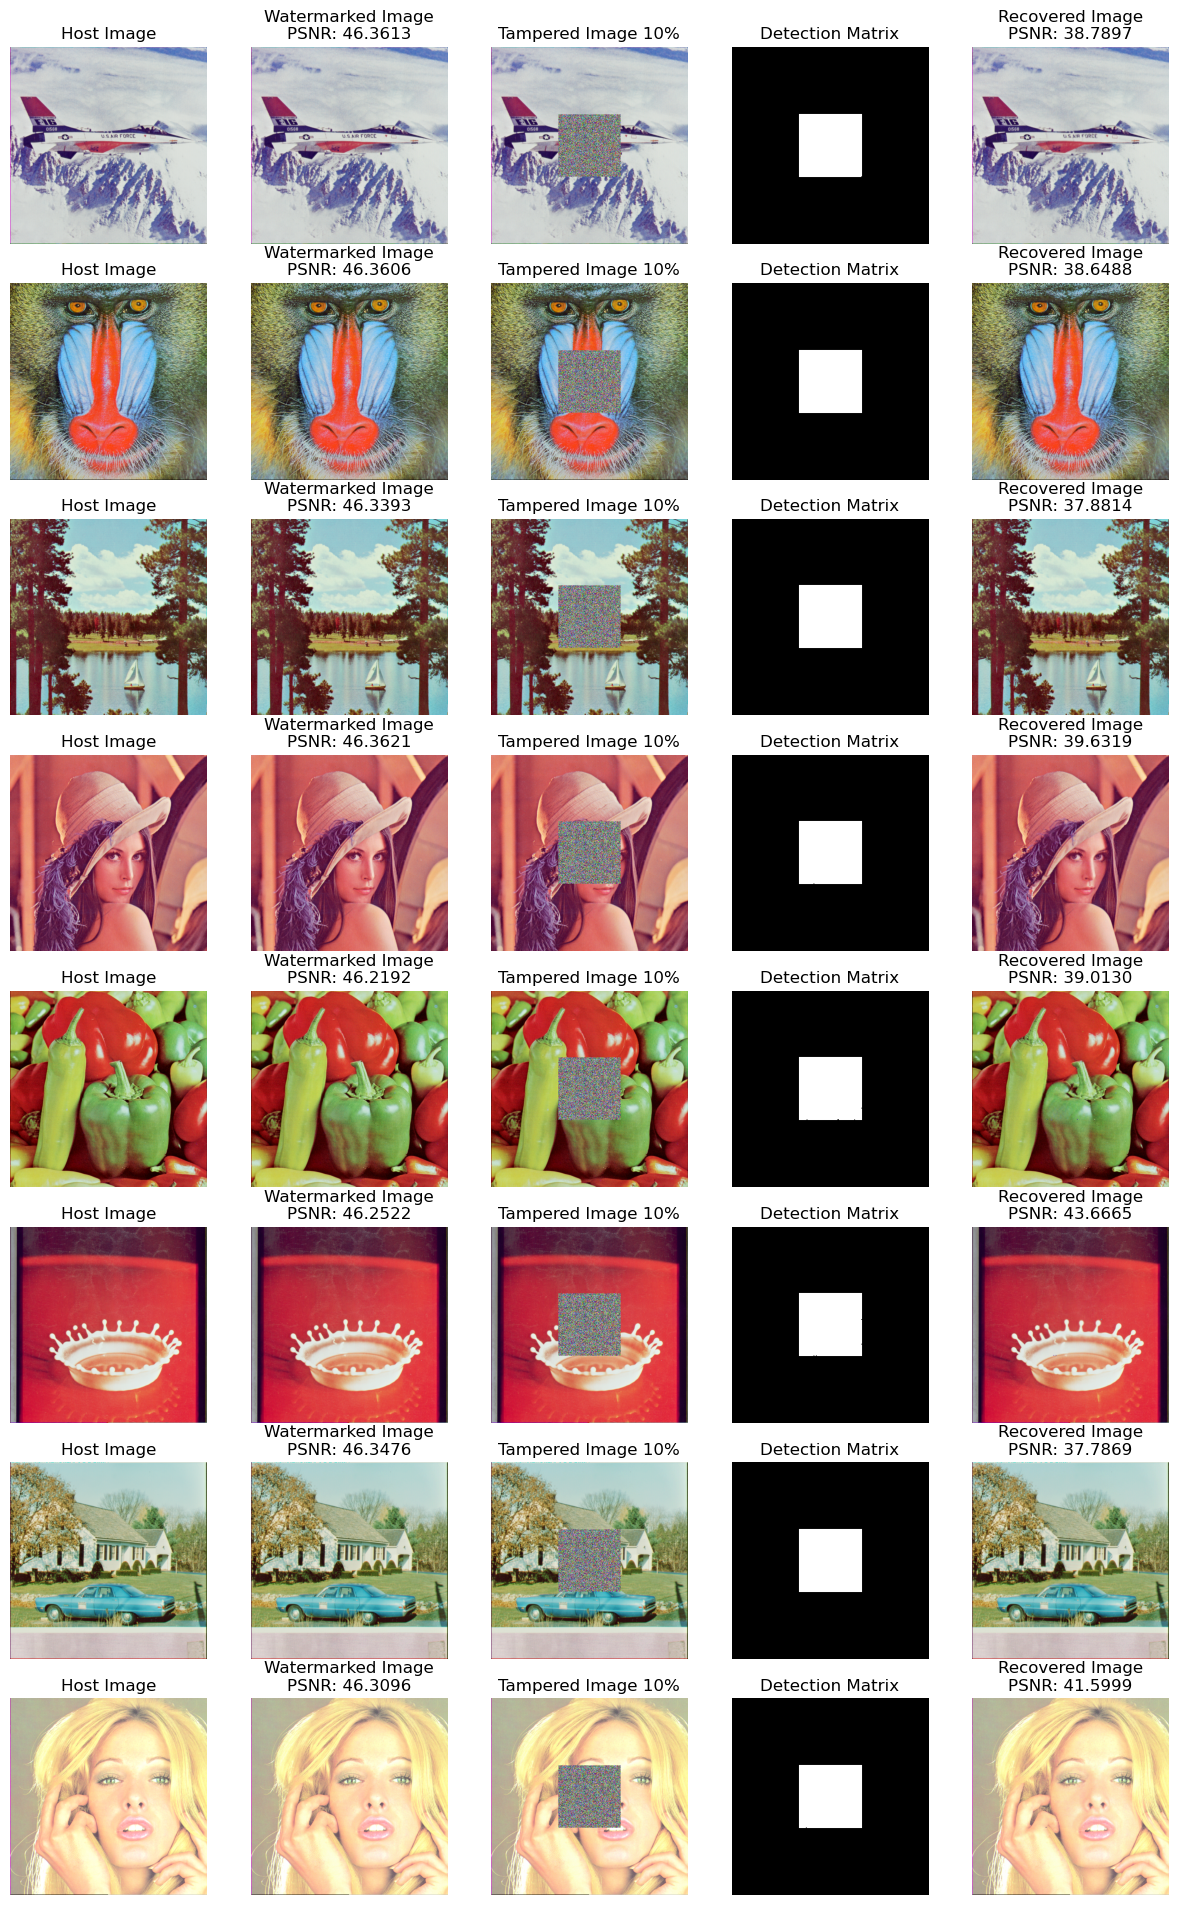

In [60]:
## Plot results:
fig, axes = plt.subplots(8, 5,figsize = (15,24))
for i in range(8):
    n_list_title = list_title.copy()
    n_list_title[1] = list_title[1] + "\n" + f'PSNR: {w_psnr_list[i]:.4f}'
    n_list_title[4] = list_title[4] + "\n" + f'PSNR: {list_recovery_10_PSNR_stage3[i]:.4f}'
    for j in range(5):
        axes[i,j].set_axis_off()
        axes[i,j].set_title(n_list_title[j])
    axes[i,0].imshow(cv2.cvtColor(list_image[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
    axes[i,1].imshow(cv2.cvtColor(list_w_image[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
    axes[i,2].imshow(cv2.cvtColor(list_t_image_10[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
    axes[i,3].imshow(1-(list_detect_matrix_10[i][:,:,0]&list_detect_matrix_10[i][:,:,1]&list_detect_matrix_10[i][:,:,2]), cmap=plt.cm.gray,vmax=1,vmin=0)
    axes[i,4].imshow(cv2.cvtColor(list_recovered_image_10[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
fig.savefig("results/result10_point5.png")

In [61]:
list_title80 = ["Host Image","Watermarked Image","Tampered Image 80%","Detection Matrix","Recovered Image"]

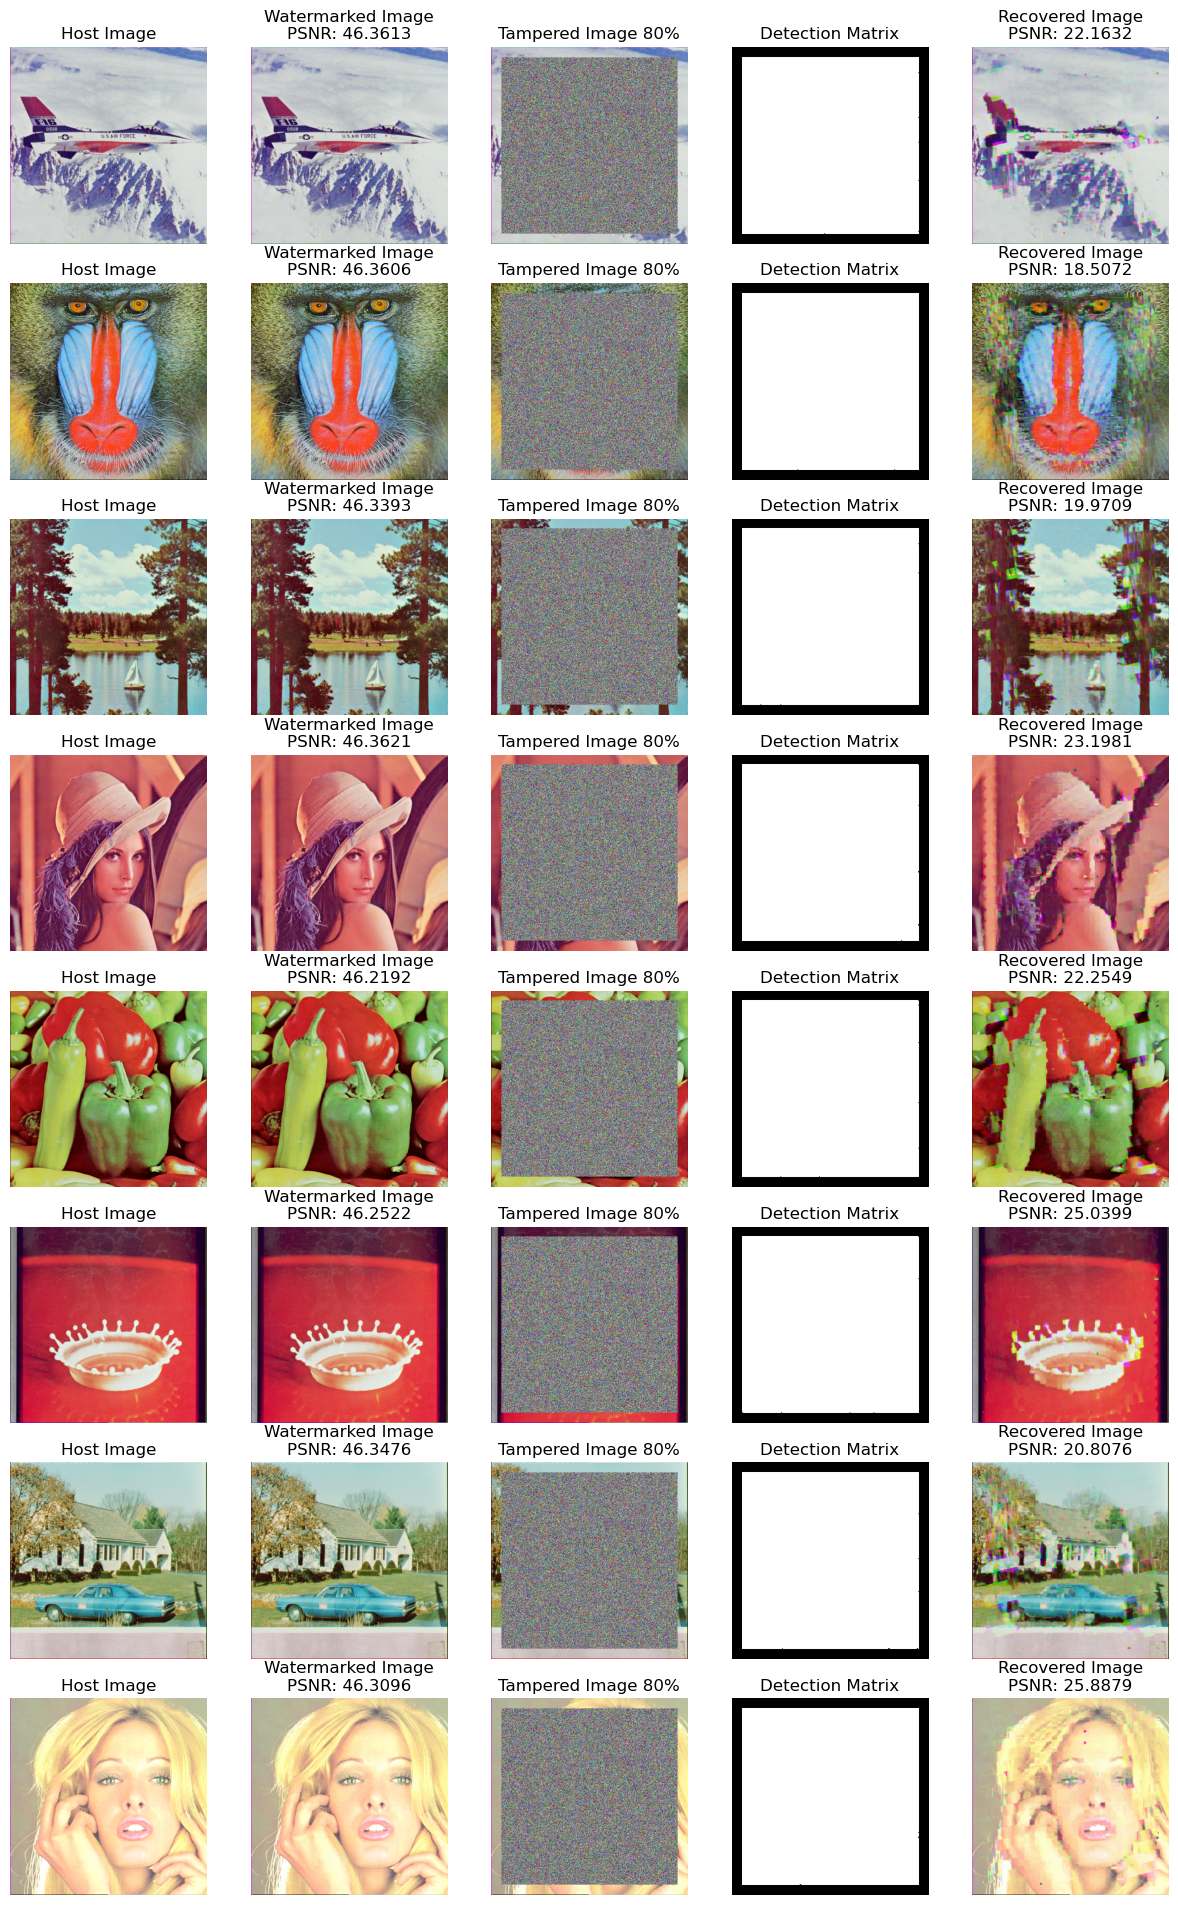

In [62]:
## Plot results:
fig, axes = plt.subplots(8, 5,figsize = (15,24))
for i in range(8):
    n_list_title = list_title80.copy()
    n_list_title[1] = list_title80[1] + "\n" + f'PSNR: {w_psnr_list[i]:.4f}'
    n_list_title[4] = list_title80[4] + "\n" + f'PSNR: {list_recovery_80_PSNR_stage3[i]:.4f}'
    for j in range(5):
        axes[i,j].set_axis_off()
        axes[i,j].set_title(n_list_title[j])
    axes[i,0].imshow(cv2.cvtColor(list_image[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
    axes[i,1].imshow(cv2.cvtColor(list_w_image[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
    axes[i,2].imshow(cv2.cvtColor(list_t_image_80[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
    axes[i,3].imshow(1-(list_detect_matrix_80[i][:,:,0]&list_detect_matrix_80[i][:,:,1]&list_detect_matrix_80[i][:,:,2]), cmap=plt.cm.gray,vmax=1,vmin=0)
    axes[i,4].imshow(cv2.cvtColor(list_recovered_image_80[i],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
fig.savefig("results/result80_point5.png")